In [270]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# rts_gmlc_dir = Path("/Users/dguittet/Projects/Dispatches/workspace/prescient_runs/simulate_with_network_with_uncertainty_w_10_reserves")
rts_gmlc_dir = Path("/Users/dguittet/Projects/Dispatches/workspace/prescient_runs/simulate_with_network_with_uncertainty_w_10_reserves_1000_shortfall_eagle")
rts_gmlc_dir = Path("/Users/dguittet/Projects/Dispatches/workspace/prescient_runs/simulate_with_network_with_uncertainty_w_10_reserves_500_shortfall_eagle")
# rts_gmlc_dir = Path("/Users/dguittet/Projects/Dispatches/workspace/prescient_runs/simulate_with_network_with_uncertainty_w_15_reserves_1000_shortfall_eagle")
# rts_gmlc_dir = Path("/Users/dguittet/Projects/Dispatches/workspace/prescient_runs/simulate_with_network_with_uncertainty_w_15_reserves_500_shortfall_eagle")
rts_gmlc_data = Path("/Users/dguittet/Projects/Dispatches/Prescient/downloads/rts_gmlc/RTS-GMLC/RTS_Data/SourceData")

bus_detail_df = pd.read_csv(rts_gmlc_dir / "bus_detail.csv")
bus_detail_df['LMP'] = bus_detail_df['LMP'].astype('float64')
bus_detail_df['LMP DA'] = bus_detail_df['LMP DA'].astype('float64')
print(bus_detail_df.columns)

source_detail_df = pd.read_csv(rts_gmlc_data / "gen.csv")
bus_names = pd.read_csv(rts_gmlc_data / "bus.csv")

Index(['Date', 'Hour', 'Minute', 'Bus', 'Demand', 'Shortfall',
       'Overgeneration', 'LMP', 'LMP DA'],
      dtype='object')


In [243]:
# compile bus id to name dict

bus_dict = {k: v for k, v in zip(bus_names['Bus ID'].values, bus_names['Bus Name'].values)}


In [244]:
zeroLMP_per_bus = {}
for bus in bus_detail_df['Bus'].unique():
    df_bus = bus_detail_df[bus_detail_df['Bus'] == bus]
    total_curtailment = df_bus[df_bus['LMP'] < 3]['LMP']
    zeroLMP_per_bus[bus] = len(total_curtailment)

zeroLMP_per_bus = {k: v for k, v in sorted(zeroLMP_per_bus.items(), key=lambda item: item[1])}
max_zeroLMP = max(v for k, v in zeroLMP_per_bus.items())
zeroLMP_per_bus


{'Asser': 2475,
 'Abel': 2476,
 'Adams': 2476,
 'Adler': 2476,
 'Agricola': 2476,
 'Aiken': 2476,
 'Alber': 2476,
 'Alder': 2476,
 'Alger': 2476,
 'Ali': 2476,
 'Allen': 2476,
 'Anna': 2476,
 'Archer': 2476,
 'Arne': 2476,
 'Arnold': 2476,
 'Arthur': 2476,
 'Attar': 2476,
 'Attila': 2476,
 'Austen': 2476,
 'Avery': 2476,
 'Bach': 2476,
 'Bacon': 2476,
 'Baffin': 2476,
 'Bailey': 2476,
 'Bain': 2476,
 'Bajer': 2476,
 'Baker': 2476,
 'Balch': 2476,
 'Balzac': 2476,
 'Banks': 2476,
 'Bardeen': 2476,
 'Barkla': 2476,
 'Barlow': 2476,
 'Barry': 2476,
 'Barton': 2476,
 'Basov': 2476,
 'Bates': 2476,
 'Bayle': 2476,
 'Bede': 2476,
 'Beethoven': 2476,
 'Behring': 2476,
 'Bell': 2476,
 'Bloch': 2476,
 'Bordet': 2476,
 'Attlee': 2478,
 'Curtiss': 2491,
 'Comte': 2492,
 'Clive': 2499,
 'Cabell': 2500,
 'Cabot': 2500,
 'Caine': 2500,
 'Calvin': 2500,
 'Camus': 2500,
 'Carew': 2500,
 'Carrel': 2500,
 'Carter': 2500,
 'Caruso': 2500,
 'Cary': 2500,
 'Caxton': 2500,
 'Cecil': 2500,
 'Chain': 2500,
 '

Text(0.5, 0.98, 'LMPs at Aubrey')

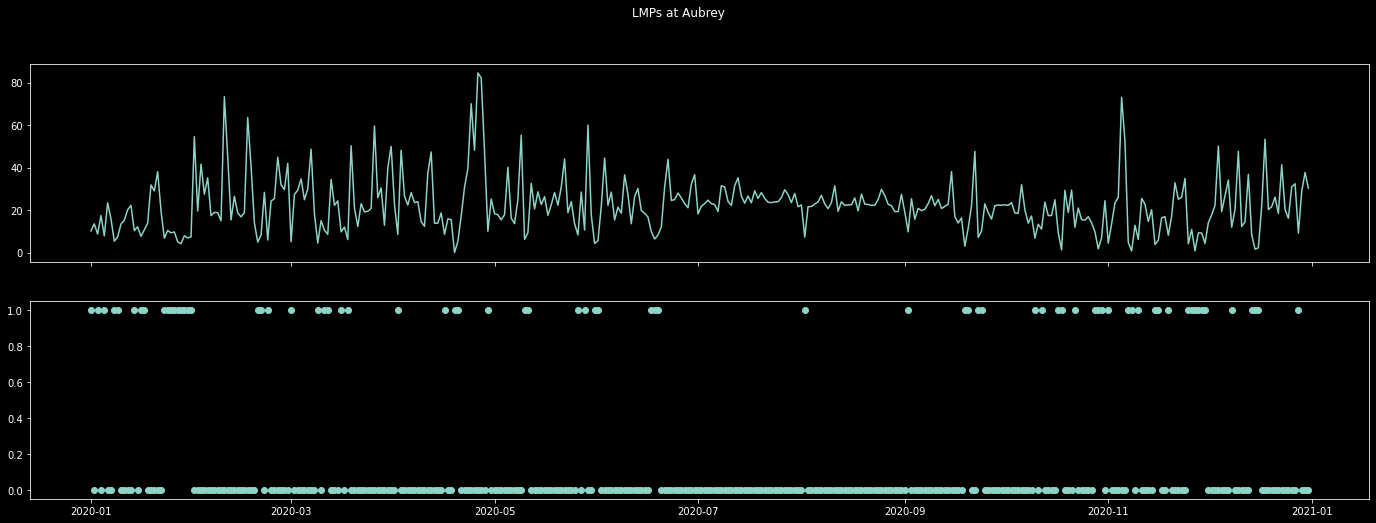

In [245]:
bus = "Aubrey"
if len(bus_detail_df[bus_detail_df['Bus'] == bus]) == 8736:
    start_date = pd.Timestamp('2020-01-02 00:00:00')
    ix = pd.date_range(start=start_date, 
                        end=start_date
                        + pd.offsets.DateOffset(days=365)
                        - pd.offsets.DateOffset(hours=1),
                        freq='1H')
    ix = ix[(ix.day != 29) | (ix.month != 2)]
elif len(bus_detail_df[bus_detail_df['Bus'] == bus]) == 8784:
    start_date = pd.Timestamp('2020-01-01 00:00:00')
    ix = pd.date_range(start=start_date, 
                        end=start_date
                        + pd.offsets.DateOffset(days=366)
                        - pd.offsets.DateOffset(hours=1),
                        freq='1H')
df_bus = pd.DataFrame(index=ix)
df_bus['LMP'] = [min(i, 200) for i in bus_detail_df[bus_detail_df['Bus'] == bus]['LMP'].values]
df_bus['low LMP'] = [1 if i < 5 else 0 for i in bus_detail_df[bus_detail_df['Bus'] == bus]['LMP'].values]

fig, ax = plt.subplots(2,1,figsize=(24, 8),sharex=True)
df_resampled = df_bus.resample('1D').mean()
df_resampled['low LMP'] = [1 if i < 12 else 0 for i in df_resampled['LMP'].values]

ax[0].plot(df_resampled['LMP'])
ax[1].scatter(df_resampled['low LMP'].index, df_resampled['low LMP'])
plt.suptitle(f"LMPs at {bus}")

Text(0.5, 0.98, 'LMPs at Caesar')

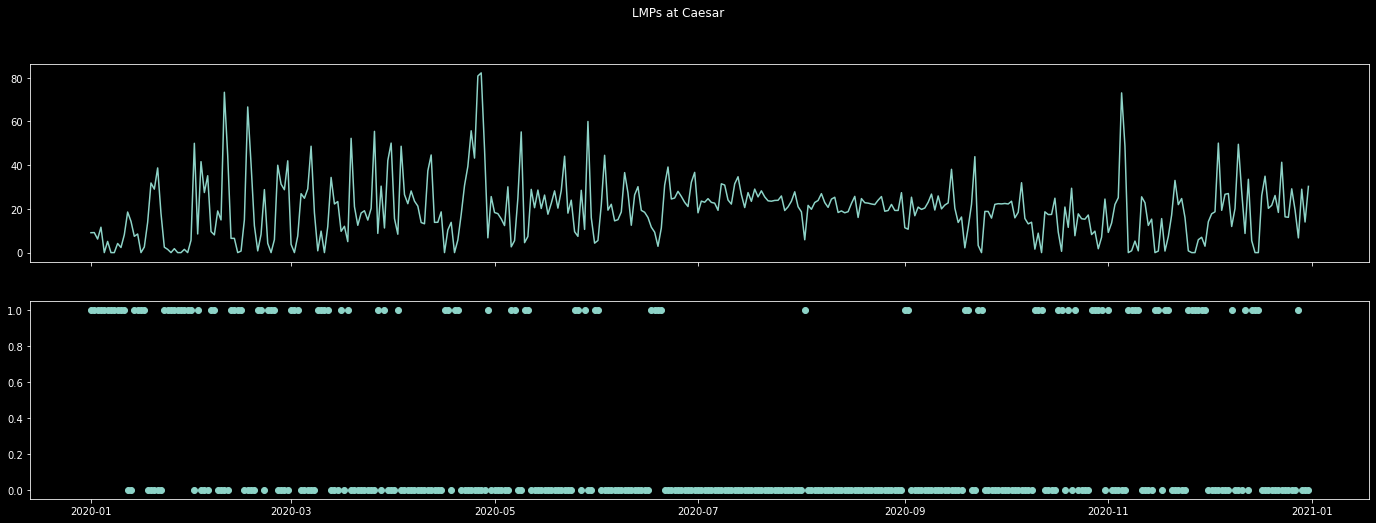

In [246]:
bus = "Caesar"
start_date = pd.Timestamp('2020-01-02 00:00:00')
df_bus = pd.DataFrame(index=ix)
df_bus['LMP'] = [min(i, 200) for i in bus_detail_df[bus_detail_df['Bus'] == bus]['LMP'].values]
df_bus['low LMP'] = [1 if i < 5 else 0 for i in bus_detail_df[bus_detail_df['Bus'] == bus]['LMP'].values]

fig, ax = plt.subplots(2,1,figsize=(24, 8),sharex=True)
df_resampled = df_bus.resample('1D').mean()
df_resampled['low LMP'] = [1 if i < 12 else 0 for i in df_resampled['LMP'].values]

ax[0].plot(df_resampled['LMP'])
ax[1].scatter(df_resampled['low LMP'].index, df_resampled['low LMP'])
plt.suptitle(f"LMPs at {bus}")

309_WIND_1 45627.524496000035 307.6704281591371
317_WIND_1 168010.51455999998 210.24967408334373
303_WIND_1 459351.17707499996 604.0321356409878
122_WIND_1 389155.56342400005 545.4177483167485


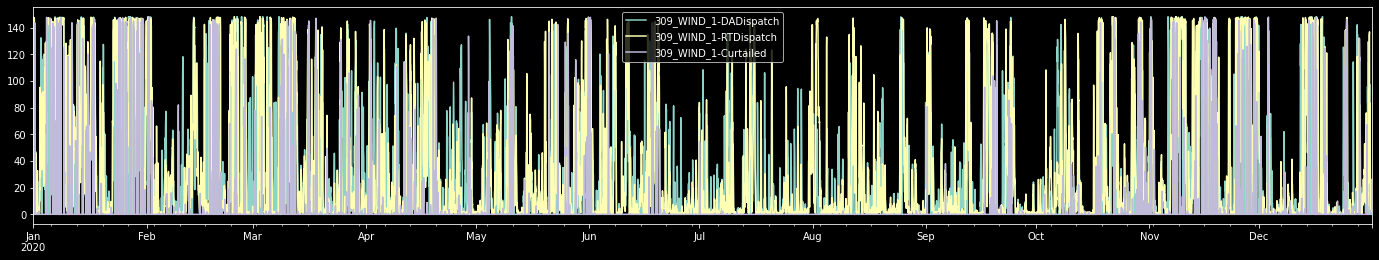

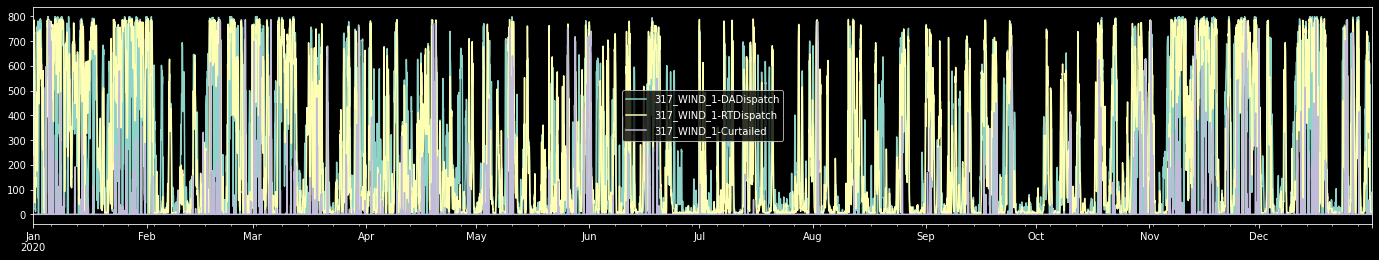

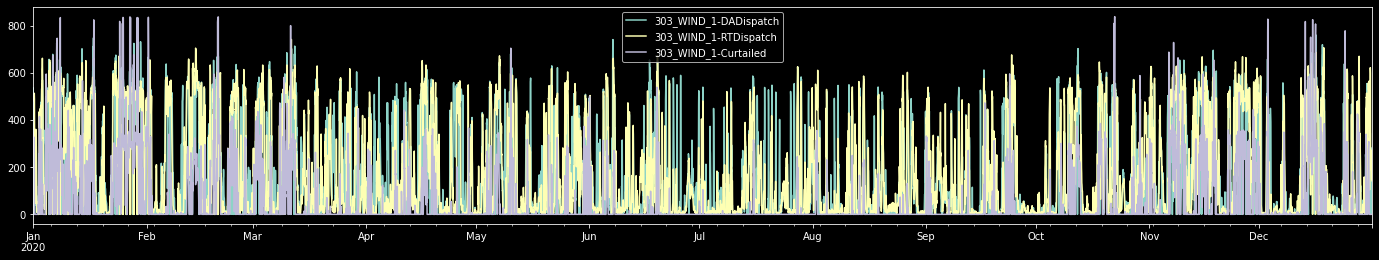

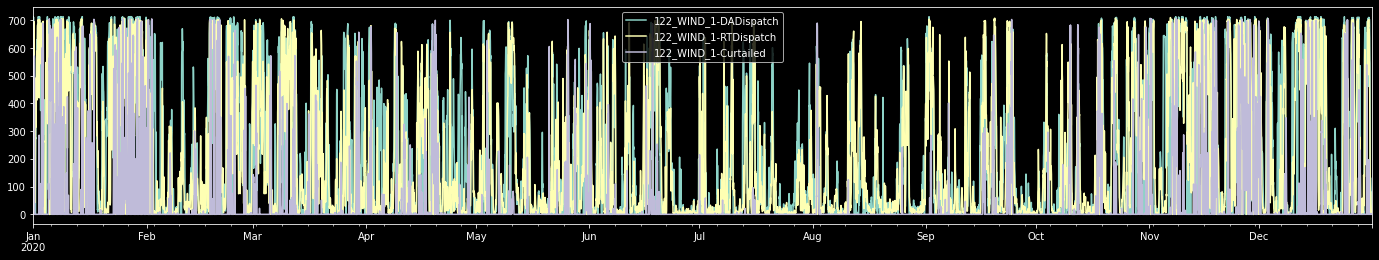

In [247]:
renewables_df = pd.read_csv(rts_gmlc_dir / "renewables_detail.csv")
df_curtailment = pd.DataFrame(index=ix)
wind_gens = []
for gen in renewables_df['Generator'].unique():
    if 'WIND' in gen:
        df_gen = pd.DataFrame(index=ix)
        df_gen[gen+"-DADispatch"] = renewables_df[renewables_df['Generator'] == gen]['Output DA'].values
        df_gen[gen+"-RTDispatch"] = renewables_df[renewables_df['Generator'] == gen]['Output'].values
        df_gen[gen+"-Curtailed"] = renewables_df[renewables_df['Generator'] == gen]['Curtailment'].values
        print(gen, sum(df_gen[gen+"-Curtailed"]), sum(df_gen[gen+"-Curtailed"]) / max(df_gen[gen+"-DADispatch"]))
        df_gen.plot(figsize=(24,4))
        df_curtailment = pd.concat([df_curtailment, df_gen], axis=1)
        wind_gens.append(gen)


In [248]:
bus_of_interest = [122, 303, 309, 317]
gens_at_bus = {}
for bus in bus_of_interest:
    gens_at_bus[bus] = source_detail_df[source_detail_df['Bus ID'] == bus]['GEN UID']

source_detail_df[source_detail_df['GEN UID'] == '309_WIND_1']

,GEN UID,Bus ID,Gen ID,Unit Group,Unit Type,Category,Fuel,MW Inj,MVAR Inj,V Setpoint p.u.,...,Emissions N2O Lbs/MMBTU,Emissions CO Lbs/MMBTU,Emissions VOCs Lbs/MMBTU,Damping Ratio,Inertia MJ/MW,Base MVA,Transformer X p.u.,Unit X p.u.,Pump Load MW,Storage Roundtrip Efficiency
153,309_WIND_1,309,1,WIND,WIND,Wind,Wind,0.0,0.0,1.0,...,0.0,0.0,0.0,0,0.0,148.3,0.0,0.0,0,0


In [249]:
# get LMPs at buses with wind
print(bus_detail_df.columns)
df_lmps = pd.DataFrame(index=ix)
for wind_gen in wind_gens:
    bus_id = wind_gen.split('_')[0]
    bus_name = bus_dict[int(bus_id)]
    df_lmps[f"{bus_id}_RTLMP"] = bus_detail_df[bus_detail_df['Bus'] == bus_name]['LMP'].values
    df_lmps[f"{bus_id}_DALMP"] = bus_detail_df[bus_detail_df['Bus'] == bus_name]['LMP DA'].values

Index(['Date', 'Hour', 'Minute', 'Bus', 'Demand', 'Shortfall',
       'Overgeneration', 'LMP', 'LMP DA'],
      dtype='object')


In [250]:
import numpy as np

thermal_df = pd.read_csv(rts_gmlc_dir / 'thermal_detail.csv')
df_thermal_dispatch = pd.DataFrame(index=ix)
for thermal_gen in thermal_df['Generator'].unique():
    if "NUCLEAR" in thermal_gen or "STEAM" in thermal_gen:
        continue
    df_thermal_dispatch[thermal_gen+"-DADispatch"] = thermal_df[thermal_df['Generator'] == thermal_gen]['Dispatch DA'].values
    df_thermal_dispatch[thermal_gen+"-RTDispatch"] = thermal_df[thermal_df['Generator'] == thermal_gen]['Dispatch'].values

on_when_LMP_high = {}
for thermal_gen in thermal_df['Generator'].unique():
    if "NUCLEAR" in thermal_gen or "STEAM" in thermal_gen:
        continue
    on_when_LMP_high[thermal_gen] = {
        'dispatched energy' : (1 - df_bus['low LMP']) * df_thermal_dispatch[thermal_gen+"-DADispatch"].values,
        'dispatched timesteps' : (1 - df_bus['low LMP']) * np.array([1 if i > 0 else 0 for i in df_thermal_dispatch[thermal_gen+"-DADispatch"].values]),
        }
# for item in on_when_LMP_high.items():
#     print(item[0], sum(item[1]['dispatched timesteps']))
on_when_LMP_high = {k: v for k, v in sorted(on_when_LMP_high.items(), key=lambda item: -sum(item[1]['dispatched timesteps']))}
# on_when_LMP_high

/var/folders/yh/xvlf1svn0xq6r2l4hzsggz2xt3qfdr/T/ipykernel_32027/1744298802.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_thermal_dispatch[thermal_gen+"-DADispatch"] = thermal_df[thermal_df['Generator'] == thermal_gen]['Dispatch DA'].values
/var/folders/yh/xvlf1svn0xq6r2l4hzsggz2xt3qfdr/T/ipykernel_32027/1744298802.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_thermal_dispatch[thermal_gen+"-RTDispatch"] = thermal_df[thermal_df['Generator'] == thermal_gen]['Dispatch'].values


Text(0.5, 0.98, 'Whether or not Thermal Generators are On at Each Hour')

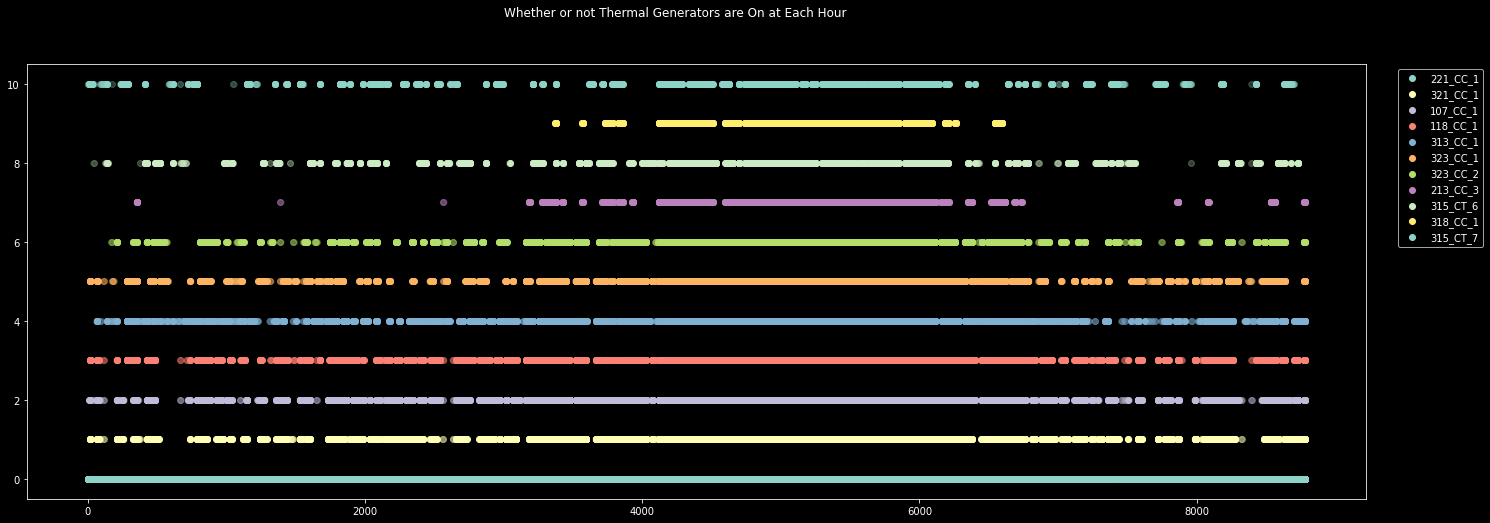

In [251]:
fig, ax = plt.subplots(1,1,figsize=(24, 8),sharex=True)
n = 0
for k, v in on_when_LMP_high.items():
    if "STEAM" not in k:
        if n > 10:
            break
        dispatch_total = [n if i > 0 else 0 for i in thermal_df[thermal_df['Generator'] == k]['Dispatch DA'].values]
        p = ax.scatter(range(len(ix)), v['dispatched timesteps'] * n, label=k)
        ax.scatter(range(len(ix)), dispatch_total, alpha=0.1, color=p.get_facecolor())
        n += 1
    
plt.legend(bbox_to_anchor=(1.02,1), loc="upper left")
plt.suptitle("Whether or not Thermal Generators are On at Each Hour")

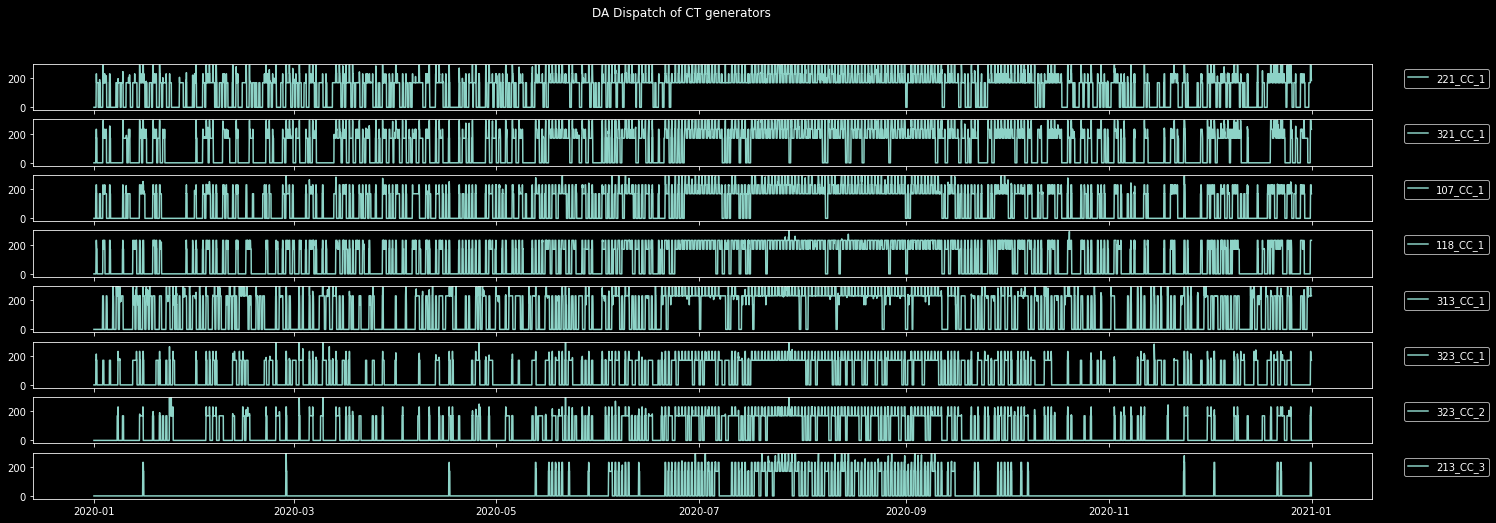

In [252]:
df_thermal_dispatch_copy = df_thermal_dispatch.copy()
fig, ax = plt.subplots(8,1,figsize=(24, 8),sharex=True)
n = 0
for k, v in on_when_LMP_high.items():
    if n >= len(ax):
        df_thermal_dispatch_copy.drop(k+'-DADispatch', inplace=True, axis=1)
        df_thermal_dispatch_copy.drop(k+'-RTDispatch', inplace=True, axis=1)
        continue
    dispatch_total = df_thermal_dispatch_copy[k+"-DADispatch"].resample('1H').mean()
    # p = ax.scatter(range(8736), v['dispatched timesteps'] * n, label=k)
    # ax.scatter(range(8736), dispatch_total, alpha=0.1, color=p.get_facecolor())
    ax[n].plot(dispatch_total, label=k)
    ax[n].legend(bbox_to_anchor=(1.02,1), loc="upper left")
    ax[n].set_ylim(-20, 300)
    n += 1
    
    plt.suptitle("DA Dispatch of CT generators")

Text(0.5, 0.98, 'Wind DA and Curtailed')

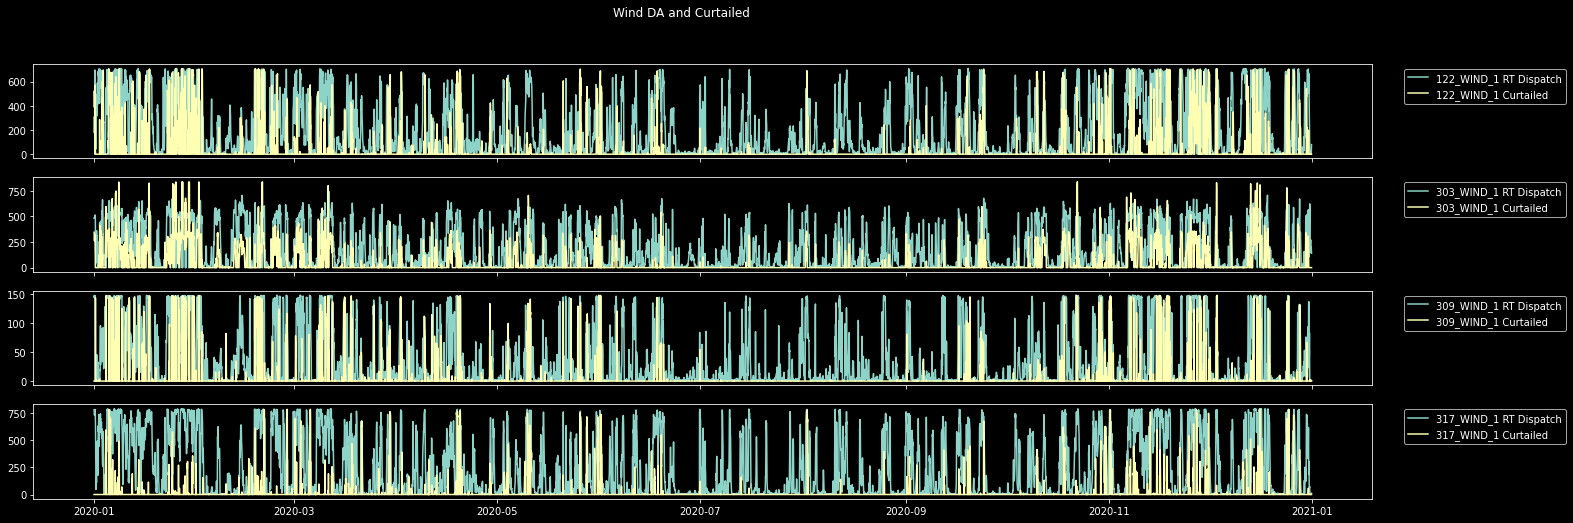

In [253]:
fig, ax = plt.subplots(4,1,figsize=(24, 8),sharex=True)
n = 0
wind_gen = ('122_WIND_1', '303_WIND_1', '309_WIND_1', '317_WIND_1')

for k in wind_gen:
    dispatch_total = df_curtailment[k+"-RTDispatch"]
    p = ax[n].plot(dispatch_total, label=k+" RT Dispatch")
    ax[n].plot(df_curtailment[k+"-Curtailed"], label=k+" Curtailed")
    ax[n].legend(bbox_to_anchor=(1.02,1), loc="upper left")
    n += 1
    
plt.suptitle("Wind DA and Curtailed")

In [254]:
# Compile Wind Power Forecast and Actuals and CF: take "forward window average" of RT
wind_rt_df = pd.read_csv(rts_gmlc_data.parent / "timeseries_data_files" / "WIND" / "REAL_TIME_wind.csv")
wind_df = pd.DataFrame(index=ix)
for k in wind_rt_df.columns:
    if "WIND" not in k:
        continue
    if len(ix) == 8736:
        rt_wind = wind_rt_df[k].values[276: 276 + 8736 * 12]
        rt_wind = np.reshape(rt_wind, (8736, 12))
        rt_wind = rt_wind.mean(1)
    elif len(ix) == 8784:
        rt_wind = wind_rt_df[k].values
        rt_wind = np.reshape(rt_wind, (8784, 12))
        rt_wind = rt_wind.mean(1)
        rt_wind = np.roll(rt_wind, 1)
    wind_df[k+"-RTPower"] = rt_wind

wind_da_df = pd.read_csv(rts_gmlc_data.parent / "timeseries_data_files" / "WIND" / "DAY_AHEAD_wind.csv")
for k in wind_da_df.columns:
    if "WIND" not in k:
        continue
    if len(ix) == 8736:
        da_wind = wind_da_df[k].values[23:23 + 8736]
    elif  len(ix) == 8784:
        da_wind = wind_da_df[k].values
    wind_df[k+"-DAPower"] = da_wind

gen_df = pd.read_csv(rts_gmlc_data / "gen.csv")
for gen in wind_gen:
    wind_pmax = gen_df[gen_df['GEN UID'] == gen]['PMax MW'].values[0]
    wind_df[gen+"-RTCF"] = wind_df[gen+"-RTPower"] / wind_pmax
    wind_df[gen+"-DACF"] = wind_df[gen+"-DAPower"] / wind_pmax
wind_df

,309_WIND_1-RTPower,317_WIND_1-RTPower,303_WIND_1-RTPower,122_WIND_1-RTPower,309_WIND_1-DAPower,317_WIND_1-DAPower,303_WIND_1-DAPower,122_WIND_1-DAPower,122_WIND_1-RTCF,122_WIND_1-DACF,303_WIND_1-RTCF,303_WIND_1-DACF,309_WIND_1-RTCF,309_WIND_1-DACF,317_WIND_1-RTCF,317_WIND_1-DACF
2020-01-01 00:00:00,0.841667,16.425000,127.325000,113.125000,142.8,795.1,480.8,713.2,0.158549,0.999580,0.150325,0.567651,0.005675,0.962913,0.020554,0.994994
2020-01-01 01:00:00,145.133333,780.808333,822.450000,699.775000,139.1,794.4,634.9,712.8,0.980764,0.999019,0.971015,0.749587,0.978647,0.937964,0.977110,0.994118
2020-01-01 02:00:00,145.566667,776.508333,799.441667,700.000000,145.3,773.6,487.3,708.4,0.981079,0.992852,0.943851,0.575325,0.981569,0.979771,0.971729,0.968089
2020-01-01 03:00:00,145.925000,733.266667,767.725000,700.325000,144.8,767.3,432.7,710.7,0.981535,0.996076,0.906405,0.510862,0.983985,0.976399,0.917616,0.960205
2020-01-01 04:00:00,145.616667,750.841667,767.116667,697.866667,137.1,752.2,407.9,701.4,0.978089,0.983041,0.905687,0.481582,0.981906,0.924477,0.939609,0.941309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,0.950000,5.000000,179.758333,5.183333,0.0,74.3,202.9,80.4,0.007265,0.112684,0.212229,0.239551,0.006406,0.000000,0.006257,0.092980
2020-12-31 20:00:00,1.275000,5.375000,137.658333,5.566667,0.0,89.6,166.6,73.0,0.007802,0.102313,0.162525,0.196694,0.008597,0.000000,0.006726,0.112126
2020-12-31 21:00:00,1.016667,5.258333,205.308333,7.108333,0.0,60.0,220.7,86.4,0.009963,0.121093,0.242395,0.260567,0.006855,0.000000,0.006580,0.075084
2020-12-31 22:00:00,1.008333,5.141667,154.700000,21.416667,0.0,20.8,251.2,105.7,0.030016,0.148143,0.182645,0.296576,0.006799,0.000000,0.006434,0.026029


In [255]:
df_all = pd.concat([df_lmps, df_thermal_dispatch, df_curtailment, wind_df], axis=1)
df_all.to_csv(rts_gmlc_dir / "Wind_Thermal_Dispatch.csv")
print(df_all.columns)
df_all

Index(['309_RTLMP', '309_DALMP', '317_RTLMP', '317_DALMP', '303_RTLMP',
       '303_DALMP', '122_RTLMP', '122_DALMP', '101_CT_1-DADispatch',
       '101_CT_1-RTDispatch',
       ...
       '303_WIND_1-DAPower', '122_WIND_1-DAPower', '122_WIND_1-RTCF',
       '122_WIND_1-DACF', '303_WIND_1-RTCF', '303_WIND_1-DACF',
       '309_WIND_1-RTCF', '309_WIND_1-DACF', '317_WIND_1-RTCF',
       '317_WIND_1-DACF'],
      dtype='object', length=140)


,309_RTLMP,309_DALMP,317_RTLMP,317_DALMP,303_RTLMP,303_DALMP,122_RTLMP,122_DALMP,101_CT_1-DADispatch,101_CT_1-RTDispatch,...,303_WIND_1-DAPower,122_WIND_1-DAPower,122_WIND_1-RTCF,122_WIND_1-DACF,303_WIND_1-RTCF,303_WIND_1-DACF,309_WIND_1-RTCF,309_WIND_1-DACF,317_WIND_1-RTCF,317_WIND_1-DACF
2020-01-01 00:00:00,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0,0.0,...,480.8,713.2,0.158549,0.999580,0.150325,0.567651,0.005675,0.962913,0.020554,0.994994
2020-01-01 01:00:00,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0,0.0,...,634.9,712.8,0.980764,0.999019,0.971015,0.749587,0.978647,0.937964,0.977110,0.994118
2020-01-01 02:00:00,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0,0.0,...,487.3,708.4,0.981079,0.992852,0.943851,0.575325,0.981569,0.979771,0.971729,0.968089
2020-01-01 03:00:00,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0,0.0,...,432.7,710.7,0.981535,0.996076,0.906405,0.510862,0.983985,0.976399,0.917616,0.960205
2020-01-01 04:00:00,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0,0.0,...,407.9,701.4,0.978089,0.983041,0.905687,0.481582,0.981906,0.924477,0.939609,0.941309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,26.755559,26.852769,26.755559,26.852769,26.755559,26.852769,26.755559,26.852769,0.0,0.0,...,202.9,80.4,0.007265,0.112684,0.212229,0.239551,0.006406,0.000000,0.006257,0.092980
2020-12-31 20:00:00,26.755559,26.814483,26.755559,26.814483,26.755559,26.814483,26.755559,26.814483,0.0,0.0,...,166.6,73.0,0.007802,0.102313,0.162525,0.196694,0.008597,0.000000,0.006726,0.112126
2020-12-31 21:00:00,25.908700,26.613779,25.908700,26.613779,25.908700,26.613779,25.908700,26.613779,0.0,0.0,...,220.7,86.4,0.009963,0.121093,0.242395,0.260567,0.006855,0.000000,0.006580,0.075084
2020-12-31 22:00:00,24.621790,24.209791,24.621790,24.209791,24.621790,24.209791,24.621790,24.209791,0.0,0.0,...,251.2,105.7,0.030016,0.148143,0.182645,0.296576,0.006799,0.000000,0.006434,0.026029
